In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras.layers import Dropout


In [0]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:


model = models.Sequential()
model.add(layers.Conv2D(512, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 512)       14336     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 512)       2359808   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 512)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 1024)      4719616   
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 1024)      9438208   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 1024)       

In [0]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
from keras.callbacks import Callback, ModelCheckpoint

checkpoint = ModelCheckpoint(
    '/content/cipher_drpout.h5', 
    monitor='val_auc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False
)

In [55]:
history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 201s 5ms/step - loss: 1.6491 - acc: 0.4050 - val_loss: 1.2779 - val_acc: 0.5459
Epoch 2/25
40000/40000 [==============================] - 200s 5ms/step - loss: 1.1476 - acc: 0.5962 - val_loss: 0.9825 - val_acc: 0.6601
Epoch 3/25
40000/40000 [==============================] - 201s 5ms/step - loss: 0.8994 - acc: 0.6875 - val_loss: 0.8260 - val_acc: 0.7184
Epoch 4/25
40000/40000 [==============================] - 201s 5ms/step - loss: 0.7381 - acc: 0.7447 - val_loss: 0.7080 - val_acc: 0.7540
Epoch 5/25
40000/40000 [==============================] - 201s 5ms/step - loss: 0.6188 - acc: 0.7844 - val_loss: 0.7135 - val_acc: 0.7571
Epoch 6/25
40000/40000 [==============================] - 201s 5ms/step - loss: 0.5192 - acc: 0.8202 - val_loss: 0.6933 - val_acc: 0.7631
Epoch 7/25
40000/40000 [==============================] - 201s 5ms/step - loss: 0.4333 - acc: 0.8499 - val_loss: 0.6486 - 

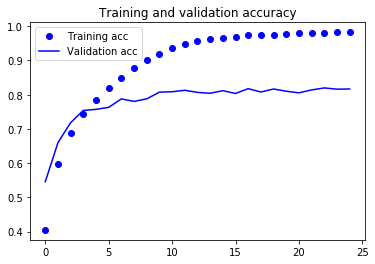

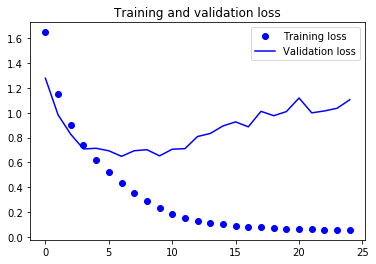

In [56]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
 model = keras.models.load_model('/content/cipher_drpout.h5')


In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 18s 2ms/step


In [59]:
test_acc

0.8092

In [60]:
test_loss

1.0793164706468583

In [61]:
import numpy as np
yActualVal=np.argmax(test_labels,axis=1)
yActualVal


array([3, 8, 8, ..., 5, 1, 7])

In [62]:

import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

yPredictedVal = model.predict_classes(test_images)
yPredictedVal


array([3, 8, 8, ..., 5, 4, 7])

In [63]:

print(classification_report(y_true=yActualVal, y_pred=yPredictedVal))



              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.90      0.90      0.90      1000
           2       0.72      0.76      0.74      1000
           3       0.61      0.68      0.64      1000
           4       0.77      0.80      0.79      1000
           5       0.82      0.60      0.69      1000
           6       0.87      0.85      0.86      1000
           7       0.81      0.88      0.84      1000
           8       0.88      0.89      0.89      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [64]:

print(confusion_matrix(y_true=yActualVal, y_pred=yPredictedVal))


[[823  17  44  18  23   2   7  11  43  12]
 [ 12 901   3   5   4   1   5   3  16  50]
 [ 37   3 764  43  66  23  24  26  11   3]
 [ 17   8  69 679  45  72  45  46  12   7]
 [  7   3  47  60 801  11  25  38   5   3]
 [  7   7  63 201  33 603  15  62   5   4]
 [  5   0  39  64  19   4 855   9   4   1]
 [  4   1  24  23  42  15   2 881   1   7]
 [ 32  17  11   8   3   5   6   6 894  18]
 [ 10  44   3  16   1   1   1   7  26 891]]
